# Introduction to Plotting

## 1. Introduction
In this workbook, we'll take a look at Pyplot and SeaBorn, two libraries for visualizing data. Why are these libraries important? A key component of any kind of data analysis and machine learning is both visualizing the data, and communicating what your algorithm is doing. For this reason, it's important to know not only how you can visualize data, but also what visualizations are appropriate for a given type of data.

In this lesson, we'll cover the following types of charts and functionality:

1. Line plots -- letting you plot continuous data;
2. Scatter plots -- letting you plot discrete data points in 2D;
3. Histograms -- letting you plot discrete datapoints in 1D;
4. Heatmaps -- letting you visualize distributions in 2D;
5. Boxplots -- letting you plot confidence intervals around data.

In addition to these chart types, we'll also look at:

1. Adding titles, datasets, axis labels and legends to your plot;
2. Customizing the look of your plot (e.g. setting line thickness, marker size, etc.)
3. Using predefined styles such as Seaborn and fivethirtyeight.
4. Working with subplots to plot multiple datasets in the same figure (e.g. position and velocity vs. time).

At the end of this lesson, you should feel comfortable plotting data in python, and have a reasonable idea of how to present a given type of data (for example, knwoing when to use a line plot versus, say, a histogram). 

## 2. Basic Plotting
Before we start plotting, we'll need something to plot. Remember in the section on numpy where we generated a dummy dataset? Here's where we'll use that skill.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define a few quick functions
f = lambda x : x ** 2
g = lambda x, sigma : f(x) + sigma * np.random.randn(x.shape[0])

# generate a noisy dataset
xs = np.linspace(0, 1, 1000)
ys = f(xs)
noisy_ys = g(xs, 0.1)

### 2.1 Imperative vs. Object Oriented
In pyplot, there are two ways of plotting data: imperative and object oriented. I'll teach you both in this notebook, since there are certain tasks that should be done using the object oriented style (3D plotting, for example), but in practice you'll mostly use the imperative style. Let's take a quick look at the difference. First, the imperative style:

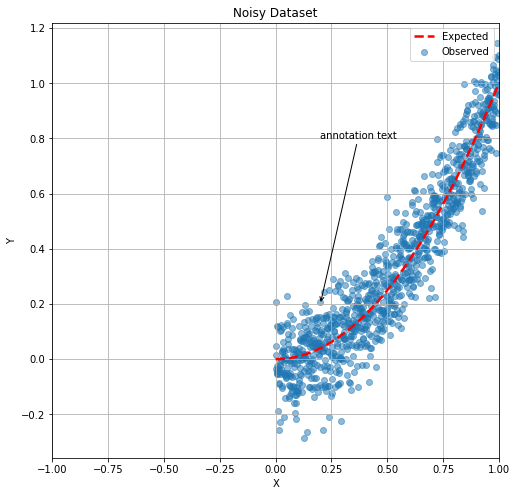

In [ ]:
# this is imperative
plt.figure(figsize=(8,8))
plt.plot(xs, ys, "r--", linewidth=2.5)
plt.scatter(xs, noisy_ys, alpha=0.5)

plt.annotate("annotation text",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.2, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3"))
plt.title("Noisy Dataset")
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(["Expected", "Observed"])
plt.grid(True)
plt.xlim([-1,1])
plt.show()

Next, the object oriented style:

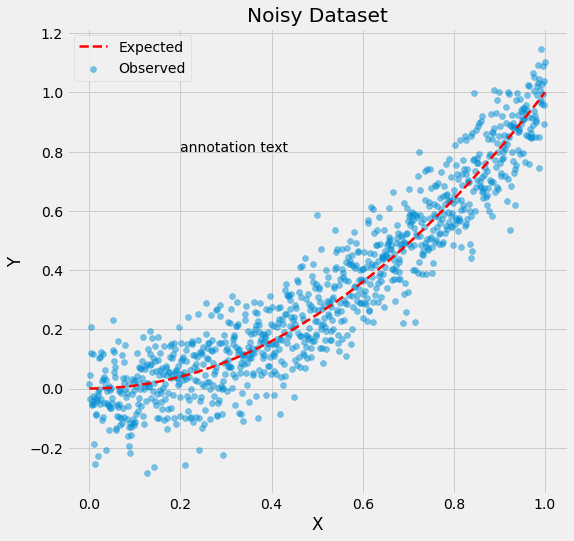

In [ ]:
# this is object oriented
fig = plt.figure(figsize=(8,8))
fig.clf()
ax = fig.add_subplot(1,1,1)
ax.plot(xs, ys, "r--", linewidth=2.5)
ax.scatter(xs, noisy_ys, alpha=0.5)

ax.annotate("annotation text",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.2, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3"))
ax.set_title("Noisy Dataset")
ax.set_ylabel("Y")
ax.set_xlabel("X")
ax.legend(["Expected", "Observed"])
ax.grid(True)

plt.style.use("fivethirtyeight")
plt.show()

Notice that in the imperative style, we called functions from pyplot directly, whereas in the object oriented style, we first initialized the figure as an object, and then worked with the object. The imperative style is very quick and simple for basic plots (notice it has few lines of code), but in practice, the object oriented style will give you more control if you need it (e.g. creating subplots and more complicated figures). Which one you'll use will depend on what type of figure you're trying to create.

### 2.2 Saving Figures

It's no good if we know how to generate plots, but we can't save them so that we can use them later. So let's go through how to do that: 

In [ ]:
# save figure here
import os

# gets the current working directory
print(os.getcwd())

# save the figure
plt.savefig("test.png", bbox_inches="tight")
! ls

/content


<Figure size 432x288 with 0 Axes>

sample_data  test.png


If you check your folder, you'll see that there should be a file there called "test.png". One thing to note is that if you do plt.show() and then save the figure, your saved file will be a blank image. You need to save the figure *before* calling plt.show().

## 3. Chart Types

We've already seen two of the chart types above, but let's go a bit more in-depth into how we might customize them.

### 3.1 Line Plots
We've already covered basic plots above, but we'll go through them in a bit more detail here. When plotting, we can change the appearance of our line plot by passing it a string of arguments. For example, the "r--" argument tells pyplot that we want a dashed red line. Let's have a look at some of the examples below:

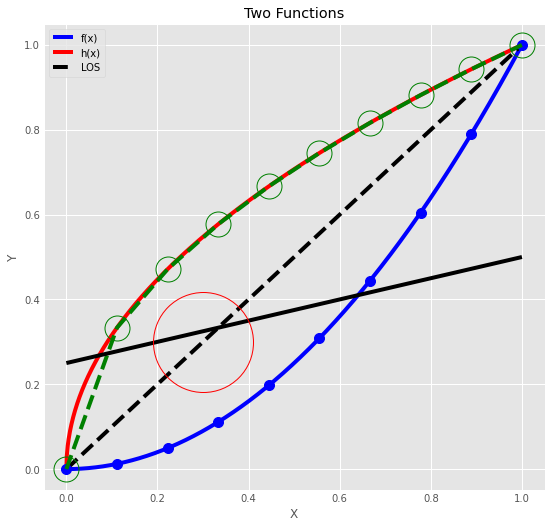

In [ ]:
h = lambda x: x ** 0.5

markers = np.linspace(0, 1, 10)
xs = np.linspace(0, 1, 1000)
f_x = f(xs)
h_x = h(xs)
m_f = f(markers)
m_h = h(markers)

plt.figure(figsize=(8,8))

# plotting multiple datasets in sequence
plt.plot(xs, f_x, "b", 
         xs, h_x, "r")

# simple line plot -- dashed black line
plt.plot(xs, xs, "k--")

# plotting blue circular markers (no line)
plt.plot(markers, m_f, "bo", markersize=10)

# controlling the line style more specifically
plt.plot(markers, m_h, color="green", linestyle="dashed", marker="o", markerfacecolor="None", markersize=25)

# plotting a single dataset
plt.plot([0.25, 0.5], "k-")

# big red circle in the center of the figure
plt.plot(0.3, 0.3, color="red", marker="o", markerfacecolor="None", markersize=100)

# adding a title and labels
plt.title("Two Functions")
plt.ylabel("Y")
plt.xlabel("X")

# adding a legend
plt.legend(["f(x)", "h(x)", "LOS"])
plt.style.use("ggplot")
plt.show()

You'll notice here that there are a few different ways of plotting a line. 

- If we have multiple datasets, we can plot them in sequence, since pyplot can accept any number of input arguments (they need to be in this order, though).

- We can plot lines individually to have a bit more control.

- We can plot simple markers without a line using the "o" string input (it should follow the color).

- We can pass arguments to the plot function to control the appearance of the line and markers more exactly.

- We can pass a set of ys to the plotting function, and it will assume xs as being 1, 2, ..., n, where n is the length of the dataset.

In general, you'll want to customize your plot to make it clear to the audience you're dealing with. For example, for a presentation at your workplace, the default pyplot style is probably appropriate. If you're plotting data for an article or a paper, you'll likely want to spend some time on the style (customizing a template, for example), or you'll use a prebuilt template that somebody else has put together.

### 3.2 Scatter Plots

arguments to scatter plot constructor

We already covered scatter plots briefly above, so let's play around with the marker styles a little bit. We'll generate another dummy dataset and plot that to see how it looks:

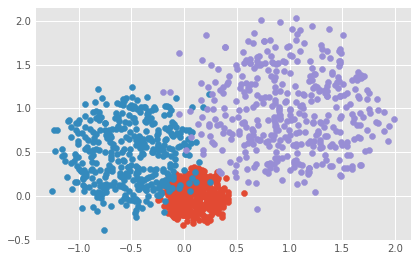

In [ ]:
from math import pi, sqrt, exp

p = lambda r, sigma : (1/sigma * sqrt(2 * pi)) * exp(-0.5 * r ** 2 / sigma ** 2)

def rejection_sample(mus, sigmas, p_x, samples=1000):
    n_dists = len(mus)
    assert len(mus) == len(sigmas)
    assert samples % n_dists == 0
    dim = mus[0].shape if not isinstance(mus[0], float) else 1
    data = [[] for _ in range(n_dists)]
    running = True
    while running:
        proposed = [np.random.uniform(-5, 5, size=dim) for _ in range(n_dists)]
        rads = [np.linalg.norm(r - m) for r, m in zip(proposed, mus)] 
        probs = [p_x(r, s) for r, s in zip(rads, sigmas)]
        u = [np.random.rand() for _ in range(n_dists)]
        for i, (u, p, d, pr) in enumerate(zip(u, probs, data, proposed)):
            if u < p: 
                if len(d) < int(samples/n_dists): d.append(pr)
        if sum([len(d) for d in data]) >= samples: running = False
    return data

m1, s1 = np.array([0.1, 0.]), 0.1
m2, s2 = np.array([-0.5, 0.5]), 0.25
m3, s3 = np.array([1., 1.]), 0.35

# this is a technique called rejection sampling that lets us generate some dummy data
d1, d2, d3 = rejection_sample([m1, m2, m3], [s1, s2, s3], p, samples=1200)

d1 = np.vstack(d1)
d2 = np.vstack(d2)
d3 = np.vstack(d3)

plt.figure()
plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0], d2[:,1])
plt.scatter(d3[:,0], d3[:,1])
plt.show()

Okay, so it's pretty clear to see from this dataset that there's overlap. It's also clear that we don't have a particularly clear image here. For example, it's quite small, and the data is hard to visualize. What are some ways we could improve on this?

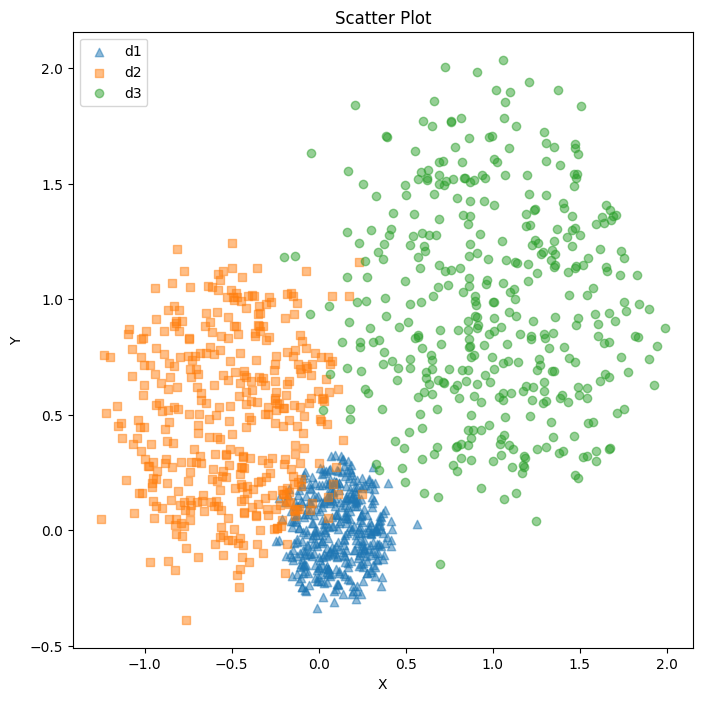

In [ ]:
# create a larger figure
plt.style.use("default")

plt.figure(figsize=(8,8))

# use open circles or different markers for different datasets
plt.scatter(d1[:,0], d1[:,1], marker="^", alpha=0.5)
plt.scatter(d2[:,0], d2[:,1], marker="s", alpha=0.5)
plt.scatter(d3[:,0], d3[:,1], marker="o", alpha=0.5)

# add title and axis labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot")

# add a legend
plt.legend(["d1","d2","d3"], loc="upper left")

plt.show()

### 3.3 Histograms & Bar Charts
Histograms and bar charts are different to scatter plots in that they only show 1D data. Bar charts don't care about x and y values, they only care about **labels** and frequency. For example, say I have the following data:

|Height Range (cm) | Frequency|
|-------------|----------|
|141 - 150 | 10|
|151 - 160 | 25|
|161 - 170 | 55|
|171 - 180 | 35|
|181 - 190 | 5|

We could plot this as follows:

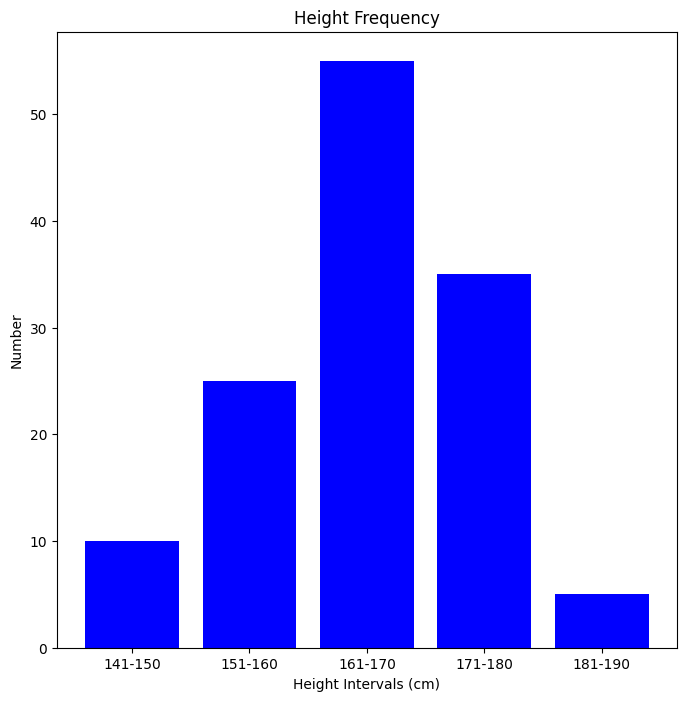

In [ ]:
labels = ["141-150", "151-160", "161-170", "171-180", "181-190"]
data = [10, 25, 55, 35, 5]

plt.figure(figsize=(8,8))
plt.bar(labels, height=data, color="blue")

plt.title("Height Frequency")
plt.xlabel("Height Intervals (cm)")
plt.ylabel("Number")
plt.show()

A histogram on the other hand, will take an array of data, and then plot it according to a series of bins. In particular, we can **normalize** the histogram by setting the argument density to True. This means that if you summed up all of the values for density, they would sum to 1.

As with other plot types, we can customize the look of our plot by changing the transparency values of the histogram, adding titles, labels, legends, etc.

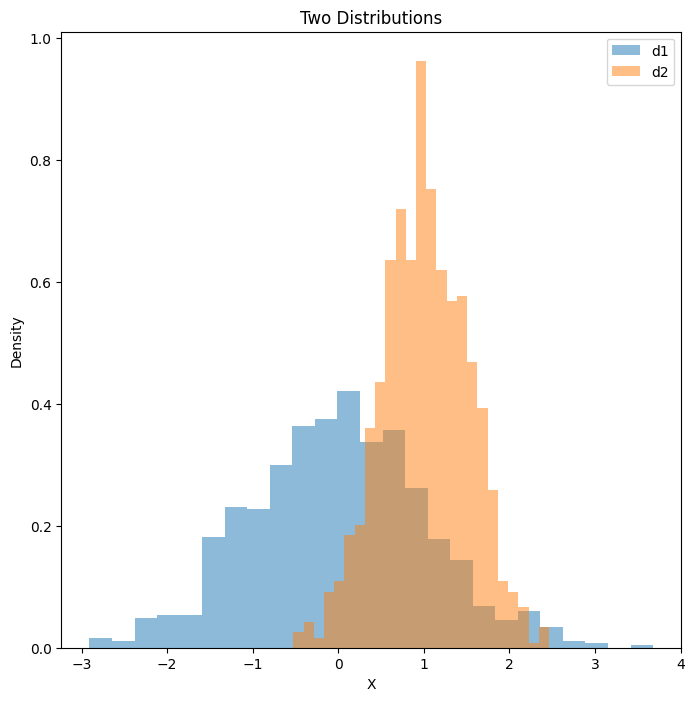

In [ ]:
bins = 25
data = np.random.randn(1000)
data2 = 1 + 0.5 * np.random.randn(1000)

"""
plt.figure(figsize=(8,8))

plt.hist(data, bins, density=True)

plt.title("Unit Normal Distribution")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()
"""

# plot a shifted distribution
plt.figure(figsize=(8,8))

plt.hist(data, bins, density=True, alpha=0.5)
plt.hist(data2, bins, density=True, alpha=0.5)

plt.title("Two Distributions")
plt.xlabel("X")
plt.ylabel("Density")

plt.legend(["d1","d2"])
# change alphas

# add a legend

plt.show()

Try playing with the bins argument to see how it changes the appearance of the histogram. You should see that as the number of bins increases, we get lots and lots of smaller, sharper bins. It's important that the number of bins reflect the size of your dataset. For example, what happens if we have a dataset of 500 points, and 100 bins?

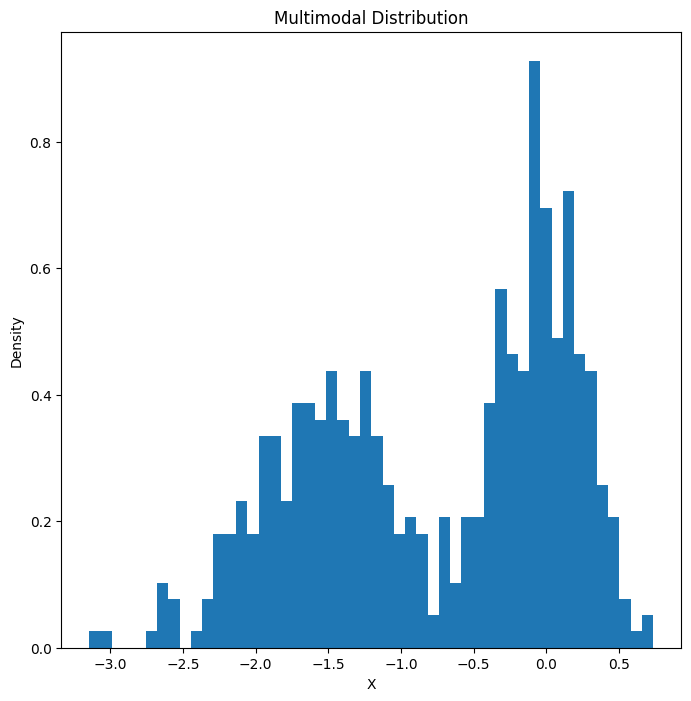

In [ ]:
# let's see how the number of bins changes the look of the graph below. What happens when bins > len(data)
bins = 50

d1 = -1.5 + 0.5 * np.random.randn(250)
d2 = 0 + 0.25 * np.random.randn(250)
data = np.append(d1, d2)

plt.figure(figsize=(8,8))
plt.hist(data, bins, density=True)
plt.title("Multimodal Distribution")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

### 3.4 Heatmaps
Heatmaps take a 2D array, and convert it into a set of "heat" values that represent the relative strength of each value. You can think of lighter squares as being hotter (i.e. they have more heat) and darker squares as being colder. Why represent data this way? Heatmaps are excellent for visualizing patterns in a 2D array. In particular, they can let us quickly view correlations in a correlation matrix, and they can let us visualize distributions very easily.

In pyplot, we use imshow to show heatmaps (although imshow has other functionality as well -- showing images, for example). Imshow expects a 2D array, and can take an additional string argument for the style of the heatmap.


In the cell below, we'll generate a random 2D matrix, and use imshow to visualize the relative strengths of the cells. Does the image remind you of anything?

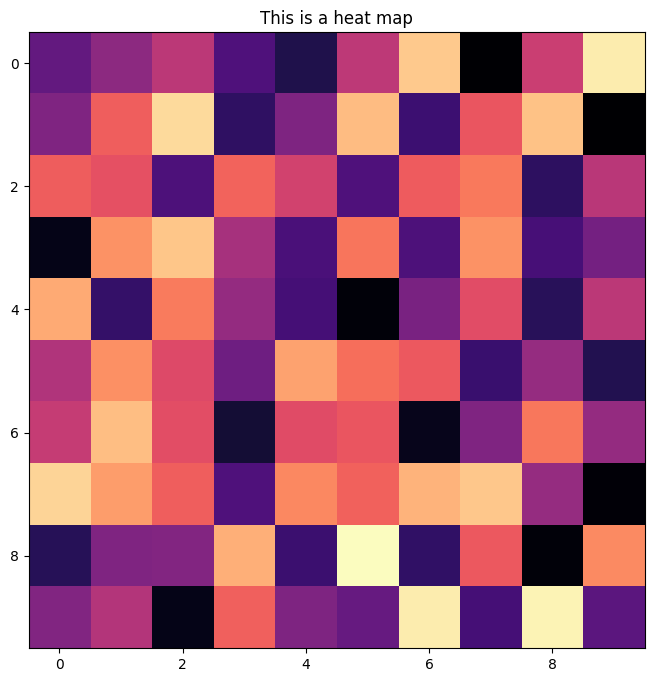

In [ ]:
data = np.random.rand(10,10)
plt.figure(figsize=(8,8))
plt.imshow(data, cmap="magma")
plt.title("This is a heat map")
plt.show()

What about if we wanted to view correlations from some dataset? Let's do that below with the Pokemon dataset:

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
[[1.         0.24237816]
 [0.24237816 1.        ]]


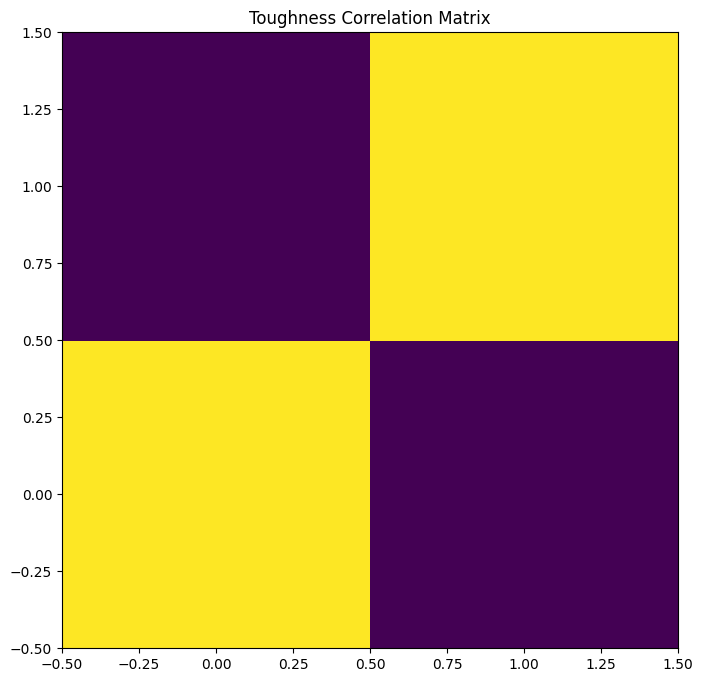

In [ ]:
# mount gdrive
from google.colab import drive 
import pandas as pd

drive.mount("/content/gdrive/") 

# load dataset
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/pokemon-2.csv")

# slice columns of interest
toughness = data[["hp", "defense"]]

# get correlation matrix
print(toughness.corr().to_numpy())

# visualize correlation matrix
plt.figure(figsize=(8,8))
plt.imshow(toughness.corr().to_numpy(), origin="lower left")
plt.title("Toughness Correlation Matrix")
plt.show()

### 3.5 Box Plots
Box and whisker plots are used to visualize a distribution of data. In particular, the box and whiskers plot shows the mean, and the various quantiles of data that we might be interested in. What does this mean? Imagine that we want to know where the 75th percentile of our data is -- this is the point where the value is greater than or equal to 75% of the data. A box and whiskers plot shows us where these additional points lie, giving us a way of visualizing how **confident** we are. For example, if our box plot has all of the quantiles lying close to the mean, we can be very confident that we'll get a value that is close to average. If they are spread far apart, we could get many different values. Furthermore, we can also tell if our distribution is skewed by how symmetrical our box plot is.


We can customize box plots using...
arguments to line plot constructor

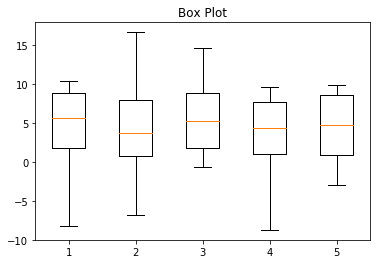

In [ ]:
# generate some dummy data
dataset = []
for _ in range(5):
    spread = np.random.rand(100) * 10
    center = np.random.randn(25) * 100
    flier_high = np.random.rand(10) * 100 + 100
    flier_low = np.random.rand(10) * -100
    data = np.concatenate((spread, center, flier_high, flier_low))
    dataset.append(data)

plt.figure()
plt.boxplot(dataset, showfliers=False)
plt.title("Box Plot")
plt.show()

We can also make horizontal boxplots by setting vert=False:

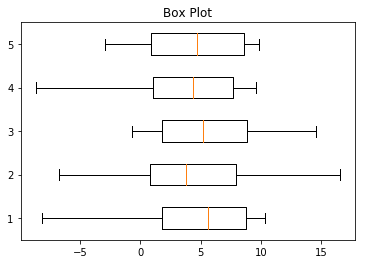

In [ ]:
plt.figure()
plt.title("Box Plot")
plt.boxplot(dataset, vert=False, showfliers=False)
plt.show()

### 3.6 Bonus: Other Plot Types

#### 3.6.1 Contour Plots
Contour plots are similar to heat maps in that they let us visualize the relative strength of data as a height, rather than as a heat. One crucial difference between contour plots and the imshow function is that for contour plots, we need to create a mesh of points in order to plot our data. For example:

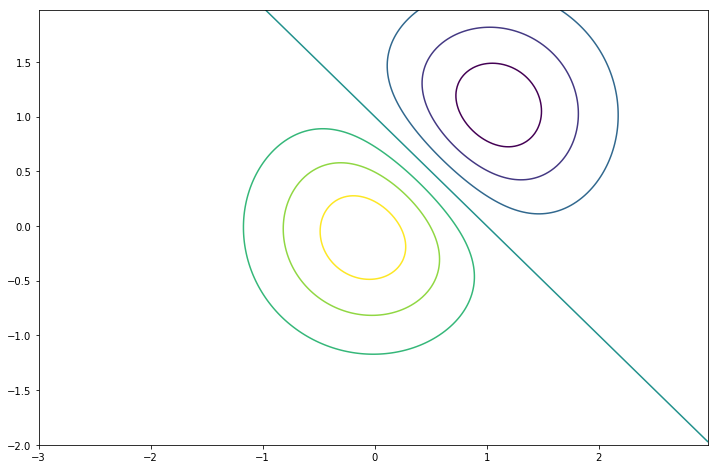

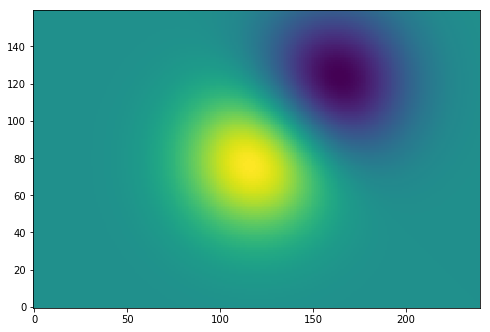

In [ ]:
def f(X, Y):
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    return (Z1 - Z2) * 2

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)

# need to generate a meshgrid
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# contour plot
plt.figure(figsize=(12,8))
plt.contour(X, Y, Z)
plt.show()

# the same figure using imshow
plt.figure(figsize=(8,12))
plt.imshow(Z, origin="lower")
plt.show()

As we can see, we need to pass multiple 2D arrays to our contour plot to generate it, and we get a heightmap of our data. This can be useful for when you want to plot multiple different datasets on the same figure like we've done above. It would be difficult to show scatter data alongside a heat map, for example, but with a scatter plot, it's quite straightforward to understand.

#### 3.6.2 Plotting in 3D
Sometimes, we can't represent data in a 2D form very easily. For example, say we wanted to visualize a sphere -- how would we do that in 2D? We would just get a series of circles. When we need to represent this type of data, we can use the 3D plotting function.

Pyplot doesn't come with 3D plotting as standard, so you'll need to use the plot_3D toolkit. Also, unlike the examples above, you'll need to use the object oriented syntax to generate a 3D plot. As a guick example:

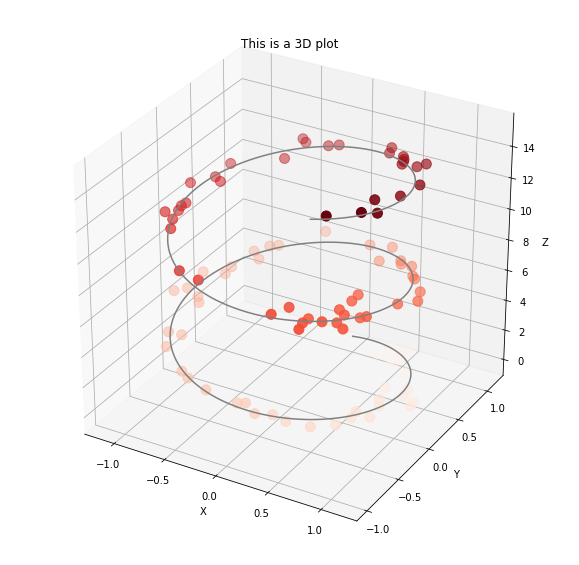

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot3D(xline, yline, zline, "grey")
ax.scatter3D(xdata, ydata, zdata, s=100, c=zdata, cmap="Reds")
plt.title("This is a 3D plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

As with 2D pyplot, there are multiple different plots that can be generated in 3D, including contour plots, wireframes, and meshes. These plots are typically used to visualize surfaces that would otherwise be difficult or impossible to visualize in 2D.

## 5. Putting It All Together

### 5.1 Sub-plots
Subplots are important for communicating data on different scales, or for showing relationships that might otherwise be difficult to realise. Additionally, they can be used for grouping information together for easier viewing -- for example, if you wanted to present several charts to your boss, but you only have limited space for a figure.

So subplots have many advantages, but they're typically trickier to use than standard plots, since you need to create a grid layout, and keep track of it when plotting. Generating subplots can also take a bit of code. In the following, I'll show you two ways of generating subplots -- which you use will come more down to preference than anything.

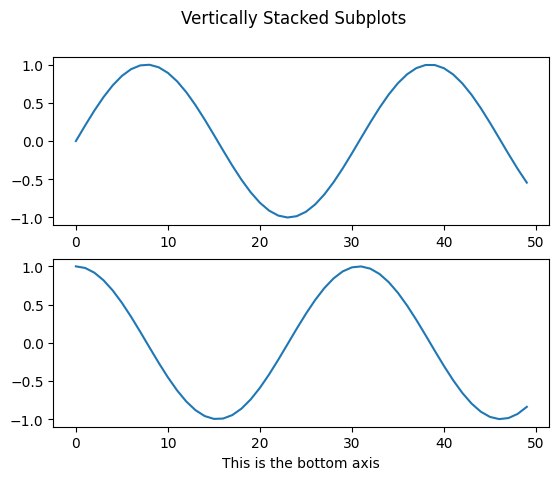

In [ ]:
fig, axs = plt.subplots(2)
print(axs)
plt.suptitle("Vertically Stacked Subplots")
x = np.linspace(0, 10)
axs[0].plot(np.sin(x))
axs[1].plot(np.cos(x))
axs[1].set_xlabel("This is the bottom axis")
plt.show()

Notice that here we had to use the suptitle method, rather than the title method we used previously. It's also common to have to track the spacing between axes with subplots, though generally, pyplot will try to handle that for you.

Here is another way of generating plots using a tool called gridspec that manages the grid layout for you:

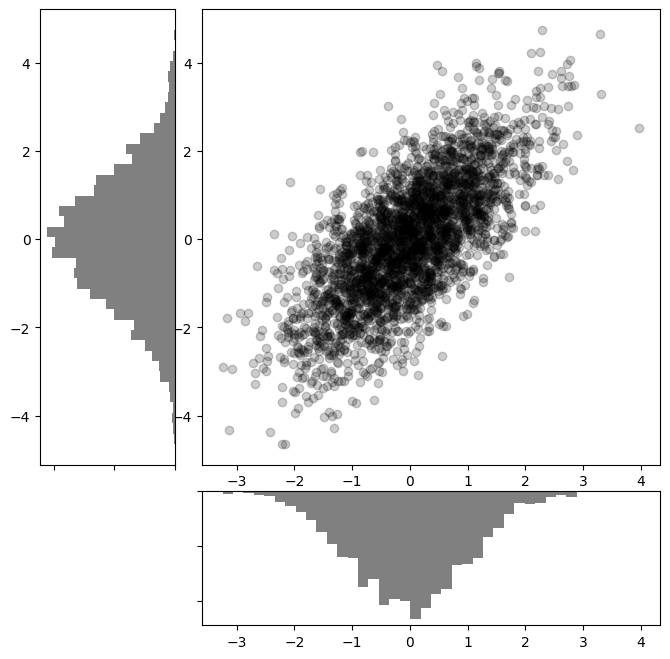

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], 
       [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(8, 8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, color="black", alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype="stepfilled", orientation="vertical", color="gray") 
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype="stepfilled", orientation="horizontal", color="gray")
y_hist.invert_xaxis()
plt.show()

### 5.2 Animating Plots
Animating plots is useful for saving and visualizing your data, and works will with IPython notebooks, since you can embed animations directly. To animate a plot, you'll need a callback function that generates the frames for you. Then, you'll need some way of taking these frames, and converting them to a movie. Ffmpeg is the most popular of these, but here I'll show you how to use IPython's inbuilt funcionality to embed a video file directly:

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

One thing to keep in mind is that your notebook file can get quite large if you have lots of video footage, which is something to keep in mind. Depending on how advanced you get with pyplot, you can produce quite sophisticated visualizations.

## 6. Exercises
For the exercises, we'll use the same Pokemon dataset that we used last week. You'll need to mount your Google drive in Colab so that you can use it. Then, load the dataset using pandas, just like you did last week. From there:

1. Choose three different features (i.e. three columns, "A", "B" and "C") that interest you, and slice them from the dataframe. You may need to clean the data (e.g. drop NaN values). Make sure that you can generate at least one scatter plot, and either a bar chart or a histogram using these three features. (1 point)

2. Plot two charts your data -- one scatter plot, and either a histogram, or a bar chart. Make sure that each figure is sized (10, 10), and has axis labels, a title, and (if appropriate) a legend. As an example, you could plot a scatter chart of HP vs Toughness, and a bar chart of the different types of Pokemon. (2 points)

3. Generate a correlation matrix of your data using pd.corr(). This should be a 3x3 array of values between -1 and 1, with a value of 1 along the diagonal. Generate a heat map using the correlation matrix and the imshow() function. Make sure you include labels so that we can see what the features are. (3 points)

4. Using your charts and heat map, give a short comment on how the features are related to one another. Do they have any correlation (zero correlation means no relationship at all)? If you have a scatter plot, are there any trends? (2 points)

5. Plot a straight line on your scatter plot using the equation y = mx + c. Make sure the line is red and dashed, and that both the line and scatter points are included in the legend (give the line the name "Fit"). Can you find values for m and c so that your line roughly goes through the middle of the points? You might need to play around with values, remembering that c is the y-intercept, and m determines how steep the line is. Annotate your line with your m and c values. (2 points)

In [ ]:
# code goes here
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount("/content/gdrive", force_remount=True)
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/pokemon.csv")




In [ ]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [ ]:
features = data[["height_m", "sp_attack", "speed"]]

features.isna().sum().sum()
features.dropna()

,height_m,sp_attack,speed
0,0.7,65,45
1,1.0,80,60
2,2.0,122,80
3,0.6,60,65
4,1.1,80,80
...,...,...,...
796,9.2,107,61
797,0.3,59,109
798,5.5,97,43
799,2.4,127,79


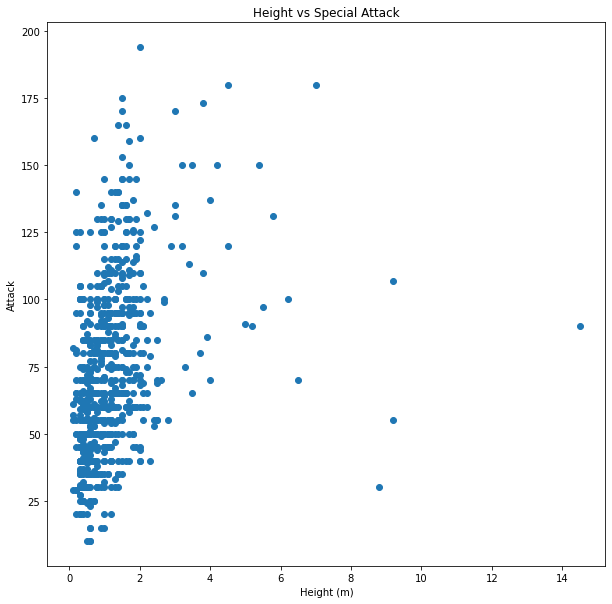

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(features["height_m"].to_numpy(), features["sp_attack"].to_numpy())
plt.title("Height vs Special Attack")
plt.xlabel("Height (m)")
plt.ylabel("Attack")
plt.show()

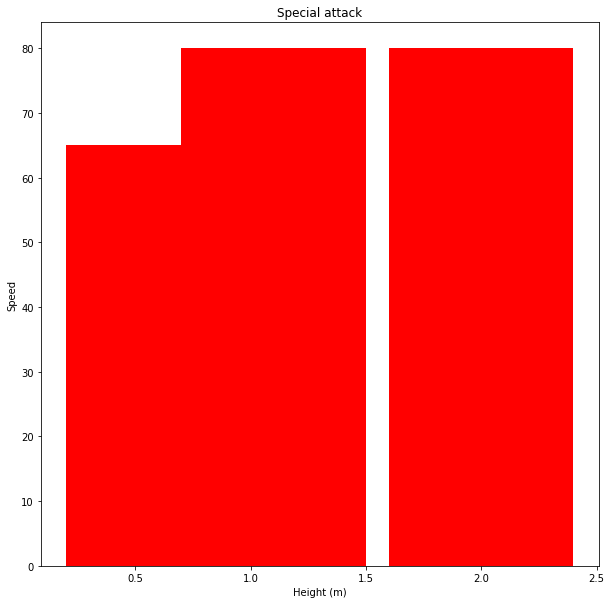

In [ ]:
labels = [0.7,1.0,2.0,0.6,1.1]
data = [45,60,80,65,80]


plt.figure(figsize=(10,10))
plt.bar(labels, height=data, color="red")

plt.title("Special attack")
plt.xlabel("Height (m)")
plt.ylabel("Speed")
plt.show()

[[1.         0.35300711 0.20220152]
 [0.35300711 1.         0.43898127]
 [0.20220152 0.43898127 1.        ]]


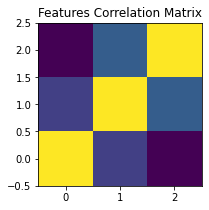

In [ ]:


# get correlation matrix
print(features.corr().to_numpy())

# visualize correlation matrix
plt.figure(figsize=(3,3))
plt.imshow(features.corr().to_numpy(), origin="lower left")
plt.title("Features Correlation Matrix")
plt.show()


In [ ]:

#Using your charts and heat map, give a short comment on how the features are related to one another.
#From the correlation matrix, we can say that they have correlation.

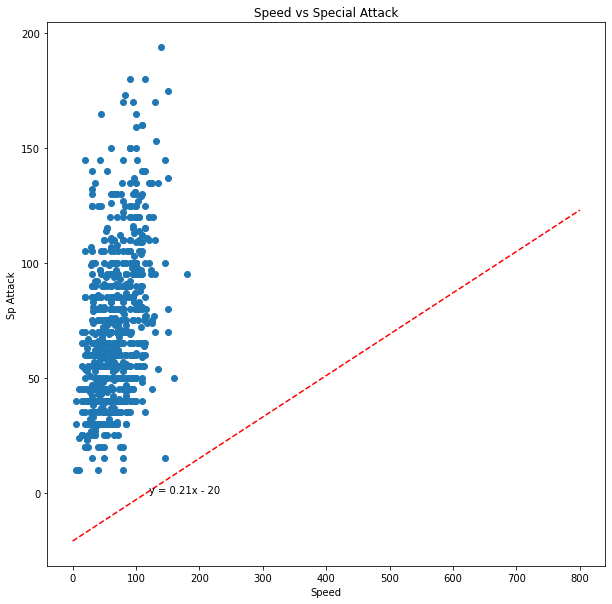

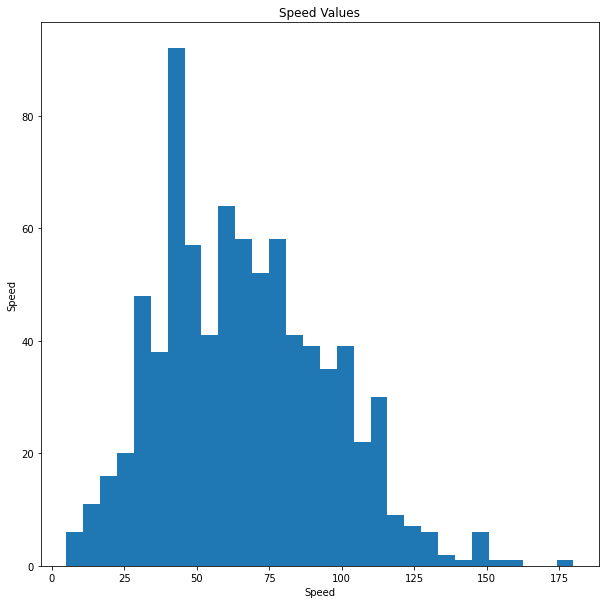

In [ ]:


#Plot a straight line on your scatter plot using the equation y = mx + c. Make sure the line is red and dashed, and that both
 #the line and scatter points are included in the legend (give the line the name "Fit"). Can you find values for m and c so
#that your line roughly goes through the middle of the points? 
#You might need to play around with values, remembering that c is the y-intercept, and m determines how steep the line is.
# Annotate your line with your m and c values. (2 points)


x = np.linspace(0, 800, 1000)
y = 0.18 * x  - 21
plt.figure(figsize=(10,10))
plt.plot(x, y, "--r")
plt.scatter(features["speed"].to_numpy(), features["sp_attack"].to_numpy())
plt.title("Speed vs Special Attack")
plt.xlabel("Speed")
plt.ylabel("Sp Attack")
plt.annotate("y = 0.21x - 20",
            xy=(100, 0), xycoords='data',
            xytext=(120, 0), textcoords='data')
plt.show()

plt.figure(figsize=(10,10))
plt.hist(features["speed"].to_numpy(), bins=30)
plt.title("Speed Values")
plt.xlabel("Speed")
plt.ylabel("Speed")
plt.show()

